Original Data:
   CustomerID  AnnualSpending  PurchaseFrequency  AvgOrderValue
0           1            1200                 12            100
1           2            3000                 30            100
2           3             450                  5             90
3           4             800                  8            100
4           5            2200                 25             88

Data Summary:
       CustomerID  AnnualSpending  PurchaseFrequency  AvgOrderValue
count    5.000000        5.000000           5.000000         5.0000
mean     3.000000     1530.000000          16.000000        95.6000
std      1.581139     1050.951949          10.931606         6.0663
min      1.000000      450.000000           5.000000        88.0000
25%      2.000000      800.000000           8.000000        90.0000
50%      3.000000     1200.000000          12.000000       100.0000
75%      4.000000     2200.000000          25.000000       100.0000
max      5.000000     3000.000000         

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


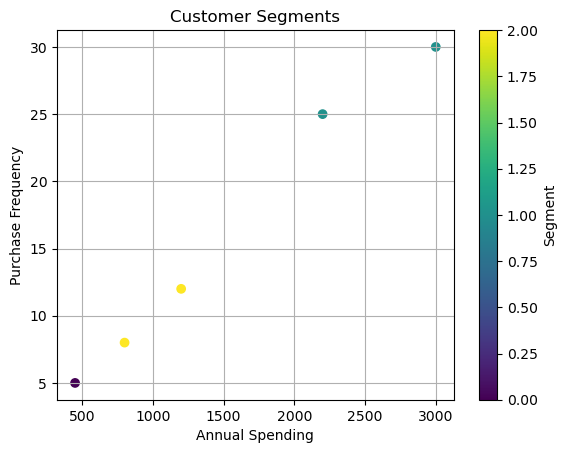


Segment Summary:
         CustomerID  AnnualSpending  PurchaseFrequency  AvgOrderValue
Segment                                                              
0               3.0           450.0                5.0           90.0
1               3.5          2600.0               27.5           94.0
2               2.5          1000.0               10.0          100.0

Final Data with Segments:
   CustomerID  AnnualSpending  PurchaseFrequency  AvgOrderValue  Segment
0           1            1200                 12            100        2
1           2            3000                 30            100        1
2           3             450                  5             90        0
3           4             800                  8            100        2
4           5            2200                 25             88        1


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create the customer dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'AnnualSpending': [1200, 3000, 450, 800, 2200],
    'PurchaseFrequency': [12, 30, 5, 8, 25],
    'AvgOrderValue': [100, 100, 90, 100, 88]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print("Original Data:")
print(df.head())

# Display basic statistics
print("\nData Summary:")
print(df.describe())

# Select features for clustering
X = df[['AnnualSpending', 'PurchaseFrequency', 'AvgOrderValue']]

# Scale the features to standardize them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters using a scatter plot
plt.scatter(df['AnnualSpending'], df['PurchaseFrequency'], c=df['Segment'], cmap='viridis')
plt.xlabel('Annual Spending')
plt.ylabel('Purchase Frequency')
plt.title('Customer Segments')
plt.colorbar(label='Segment')
plt.grid(True)
plt.show()

# Group by segment and calculate mean values to analyze segments
print("\nSegment Summary:")
segment_summary = df.groupby('Segment').mean(numeric_only=True)
print(segment_summary)

# Display the final DataFrame with customer segments
print("\nFinal Data with Segments:")
print(df)

Original Data:
   CustomerID  AnnualSpending  PurchaseFrequency  AvgOrderValue
0           1            1200                 12            100
1           2            3000                 30            100
2           3             450                  5             90
3           4             800                  8            100
4           5            2200                 25             88


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

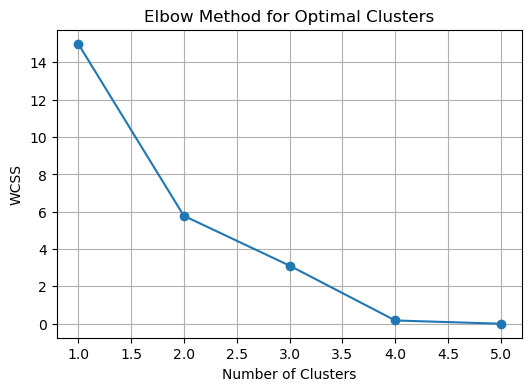

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Cluster Centers (Original Scale):
   AnnualSpending  PurchaseFrequency  AvgOrderValue
0          2600.0               27.5           94.0
1          1000.0               10.0          100.0
2           450.0                5.0           90.0


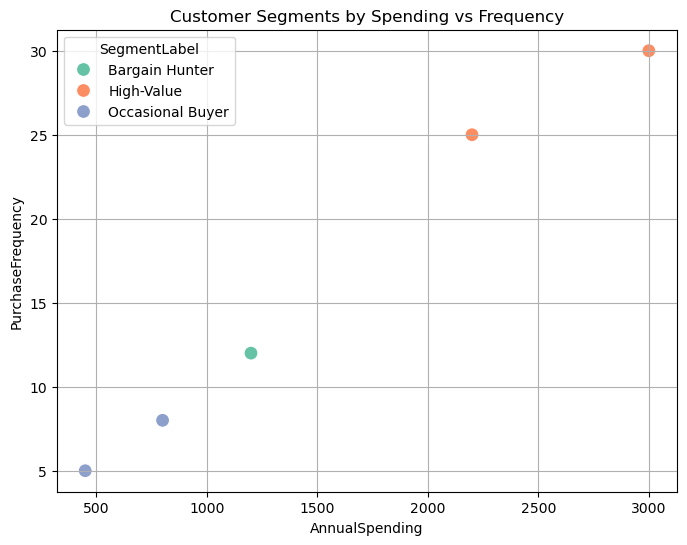


Final Data with Cluster and Segment Labels:
   CustomerID  AnnualSpending  PurchaseFrequency  AvgOrderValue  Segment  \
0           1            1200                 12            100        1   
1           2            3000                 30            100        0   
2           3             450                  5             90        2   
3           4             800                  8            100        1   
4           5            2200                 25             88        0   

       SegmentLabel  
0    Bargain Hunter  
1        High-Value  
2  Occasional Buyer  
3  Occasional Buyer  
4        High-Value  


In [2]:
# 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 2. Create the dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'AnnualSpending': [1200, 3000, 450, 800, 2200],
    'PurchaseFrequency': [12, 30, 5, 8, 25],
    'AvgOrderValue': [100, 100, 90, 100, 88]
}

df = pd.DataFrame(data)

# 3. Display data
print("Original Data:")
print(df)

# 4. Select features for clustering
features = ['AnnualSpending', 'PurchaseFrequency', 'AvgOrderValue']
X = df[features]

# 5. Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Optional: Use Elbow Method to choose best number of clusters
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(6,4))
plt.plot(range(1, 6), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 7. Apply KMeans clustering (choosing 3 clusters based on elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# 8. Analyze the cluster centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("\nCluster Centers (Original Scale):")
print(centroids)

# 9. Label clusters manually based on centroid behavior
# This logic can vary depending on your centroid values
def label_segment(row):
    if row['AnnualSpending'] > 2000:
        return 'High-Value'
    elif row['PurchaseFrequency'] < 10:
        return 'Occasional Buyer'
    else:
        return 'Bargain Hunter'

df['SegmentLabel'] = df.apply(label_segment, axis=1)

# 10. Visualize the clusters using seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='AnnualSpending', y='PurchaseFrequency', hue='SegmentLabel', s=100, palette='Set2')
plt.title('Customer Segments by Spending vs Frequency')
plt.grid(True)
plt.show()

# 11. Final Data Output
print("\nFinal Data with Cluster and Segment Labels:")
print(df[['CustomerID', 'AnnualSpending', 'PurchaseFrequency', 'AvgOrderValue', 'Segment', 'SegmentLabel']])